In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.cluster import KMeans

In [3]:
df = pd.read_json('corpus2.json')

In [4]:
df.head()

,id,cve,project_name,description,mistakes,tag_list
0,1037,CVE-2014-7948,chromium,Google Chrome caches pages despite having an S...,I think that the vulenrability is interesting ...,"[{'id': 8, 'tag': 'bounty'}, {'id': 95, 'tag':..."
1,1158,CVE-2015-6757,chromium,Trying to access data in ServiceWorker after i...,The mistake made here was a basic C coding mis...,"[{'id': 5, 'tag': 'lifetime-1y2y'}, {'id': 8, ..."
2,1489,CVE-2017-5125,chromium,Embargoed. Heap overflow in Skia.\n,None,"[{'id': 14, 'tag': 'cwe-119'}, {'id': 357, 'ta..."
3,184,CVE-2010-4488,chromium,This bug involves an unhandled case in which t...,"This could be a coding or design error, there ...","[{'id': 3, 'tag': 'lifetime-90d180d'}, {'id': ..."
4,1269,CVE-2016-1682,chromium,Checks to verify the content security policy (...,It seems as though the developer just didn't t...,"[{'id': 1, 'tag': 'lifetime-30d'}, {'id': 8, '..."


In [5]:
df.project_name.unique()

array(['chromium', 'httpd', 'tomcat', 'struts', 'django'], dtype=object)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 726 entries, 0 to 725
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            726 non-null    int64 
 1   cve           726 non-null    object
 2   project_name  726 non-null    object
 3   description   726 non-null    object
 4   mistakes      569 non-null    object
 5   tag_list      726 non-null    object
dtypes: int64(1), object(5)
memory usage: 34.2+ KB


In [7]:
df['description'] = df['description'].str.strip()

In [8]:
nan_value = float("NaN")
df.replace("", nan_value, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 726 entries, 0 to 725
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            726 non-null    int64 
 1   cve           726 non-null    object
 2   project_name  726 non-null    object
 3   description   726 non-null    object
 4   mistakes      568 non-null    object
 5   tag_list      726 non-null    object
dtypes: int64(1), object(5)
memory usage: 34.2+ KB


In [10]:
df.dropna(subset = ['description'], inplace=True)

In [11]:
df = df.drop(columns=['id','project_name'])

In [12]:
df.head()

,cve,description,mistakes,tag_list
0,CVE-2014-7948,Google Chrome caches pages despite having an S...,I think that the vulenrability is interesting ...,"[{'id': 8, 'tag': 'bounty'}, {'id': 95, 'tag':..."
1,CVE-2015-6757,Trying to access data in ServiceWorker after i...,The mistake made here was a basic C coding mis...,"[{'id': 5, 'tag': 'lifetime-1y2y'}, {'id': 8, ..."
2,CVE-2017-5125,Embargoed. Heap overflow in Skia.,None,"[{'id': 14, 'tag': 'cwe-119'}, {'id': 357, 'ta..."
3,CVE-2010-4488,This bug involves an unhandled case in which t...,"This could be a coding or design error, there ...","[{'id': 3, 'tag': 'lifetime-90d180d'}, {'id': ..."
4,CVE-2016-1682,Checks to verify the content security policy (...,It seems as though the developer just didn't t...,"[{'id': 1, 'tag': 'lifetime-30d'}, {'id': 8, '..."


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [14]:
X = df.drop(columns=['cve'])

In [15]:
X.head()

,description,mistakes,tag_list
0,Google Chrome caches pages despite having an S...,I think that the vulenrability is interesting ...,"[{'id': 8, 'tag': 'bounty'}, {'id': 95, 'tag':..."
1,Trying to access data in ServiceWorker after i...,The mistake made here was a basic C coding mis...,"[{'id': 5, 'tag': 'lifetime-1y2y'}, {'id': 8, ..."
2,Embargoed. Heap overflow in Skia.,None,"[{'id': 14, 'tag': 'cwe-119'}, {'id': 357, 'ta..."
3,This bug involves an unhandled case in which t...,"This could be a coding or design error, there ...","[{'id': 3, 'tag': 'lifetime-90d180d'}, {'id': ..."
4,Checks to verify the content security policy (...,It seems as though the developer just didn't t...,"[{'id': 1, 'tag': 'lifetime-30d'}, {'id': 8, '..."


In [ ]:
X = X['description'].values.astype("U")

In [30]:
sample = X[['description','mistakes']]
sample = X.apply(lambda col: col.str.strip())
sample.dropna(subset = ['description','mistakes'])

,description,mistakes,tag_list
0,Google Chrome caches pages despite having an S...,I think that the vulenrability is interesting ...,NaN
1,Trying to access data in ServiceWorker after i...,The mistake made here was a basic C coding mis...,NaN
3,This bug involves an unhandled case in which t...,"This could be a coding or design error, there ...",NaN
4,Checks to verify the content security policy (...,It seems as though the developer just didn't t...,NaN
5,This was a vulnerability that affected people ...,It seems like the fault was in the code. The f...,NaN
...,...,...,...
720,Apache Description - An out-of-bounds memory r...,"This was a coding mistake, and to an extent, a...",NaN
721,Path traversal vulnerability that can lead to ...,"Ultimately, this vunerability was the direct c...",NaN
722,A fix applied in a previous update didn't acco...,The correct sanitization regex pattern was pre...,NaN
723,Use after free in printing. When the cross pro...,PrintPreviewDone() got called multiple times a...,NaN


In [31]:
import scipy.sparse as sp
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
vect = CountVectorizer(ngram_range=(1, 3))
train = sp.hstack(sample.apply(lambda col: vect.fit_transform(col)))

AttributeError: 'NoneType' object has no attribute 'lower'

In [36]:
vectorizer = TfidfVectorizer(stop_words='english')
features = vectorizer.fit_transform(X)

In [37]:
features

<3x3 sparse matrix of type '<class 'numpy.float64'>'
	with 3 stored elements in Compressed Sparse Row format>

In [42]:
distortions = []
K = range(5,70)
for k in K:
    kmeanModel = KMeans(n_clusters=k,n_samples = 5)
    kmeanModel.fit(features)
    distortions.append(kmeanModel.inertia_)

TypeError: __init__() got an unexpected keyword argument 'n_samples'

ValueError: x and y must have same first dimension, but have shapes (65,) and (0,)

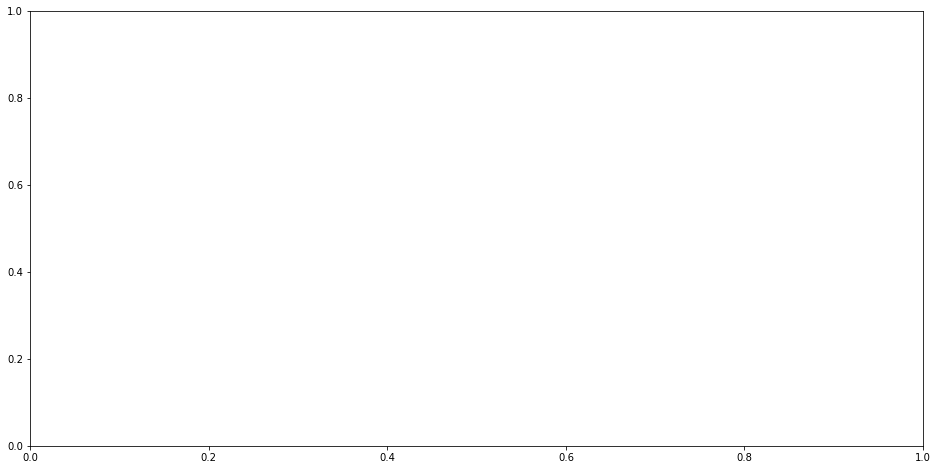

In [43]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
k = 40
model = KMeans(n_clusters=k, init='k-means++', max_iter=600, n_init=50)
model.fit(features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=600,
       n_clusters=40, n_init=50, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
df['cluster'] = model.labels_

In [ ]:
df.head()

,cve,description,mistakes,cluster
0,CVE-2013-6665,Heap-based buffer overflow in Chrome's resourc...,The vulnerabliity here was a pretty simple ove...,16
1,CVE-2017-5093,"UI spoofing in Blink, a browser engine used in...","In my opinion, there were coding and design mi...",38
2,CVE-2017-5107,User information leak via SVG. By rendering a ...,None,8
3,CVE-2017-5060,URL spoofing in Omnibox. Certain Cyrillic char...,None,39
4,CVE-2014-1748,The scrollbar rectangles for images were not p...,The main mistake that was made here was less o...,8


In [ ]:
df.groupby('cluster').size()

cluster
0     26
1     13
2     23
3     11
4      9
5     14
6     43
7     21
8     38
9     22
10    59
11     5
12    20
13    10
14    11
15    11
16    20
17    17
18    14
19     9
20    21
21    11
22     5
23    48
24    26
25    17
26     9
27    23
28     9
29    13
30    13
31    12
32    30
33     6
34    24
35    11
36    10
37    10
38    18
39     9
dtype: int64

In [ ]:
compression_opts = dict(method='zip',
                        archive_name='out.csv')  
df.to_csv('out.zip', index=False,
          compression=compression_opts)  

In [ ]:
clusters = df.groupby('cluster')

for cluster in clusters.groups:
  f = open('cluster' +str(cluster)+ '.csv', 'w')
  data = clusters.get_group(cluster)[['cve','description']]
  f.write(data.to_csv(index_label='id'))
  f.close()